# Task
🔹 Improve model performance through feature engineering and hyperparameter tuning.
🛠 Tasks to Perform
✅ Feature Engineering:
● Create new features (e.g., total score from subject scores in a student dataset).
✅ Hyperparameter Tuning:
● Use GridSearchCV to optimize model parameters.
📌 Deliverable: Improved model accuracy and performance.

📌 Section 2: Fraud Detection with Decision Trees
🎯 Objective
🔹 Detect fraudulent transactions based on patterns in financial data.

Here is all the data you need:
"fraud detection.csv"

## Data loading

### Subtask:
Load the "fraud detection.csv" dataset.


**Reasoning**:
Load the dataset and display its first few rows and shape to verify the data loading.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('fraud detection.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'fraud detection.csv' not found.")
    df = None

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


(594643, 10)


## Data exploration

### Subtask:
Explore the dataset to understand its structure, identify potential features for engineering, and check for missing values or outliers.


**Reasoning**:
I need to examine the data types and descriptive statistics, analyze feature distributions, investigate the target variable, and explore relationships between features and the target variable. This can be done in a single code block.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB
None
                 step       customer     age  gender zipcodeOri  \
count   594643.000000         594643  594643  594643     594643   
unique            NaN           4112       8       4          1   
top               NaN  'C1978250683'     '2'     'F'    '28007'   
freq              NaN            265 

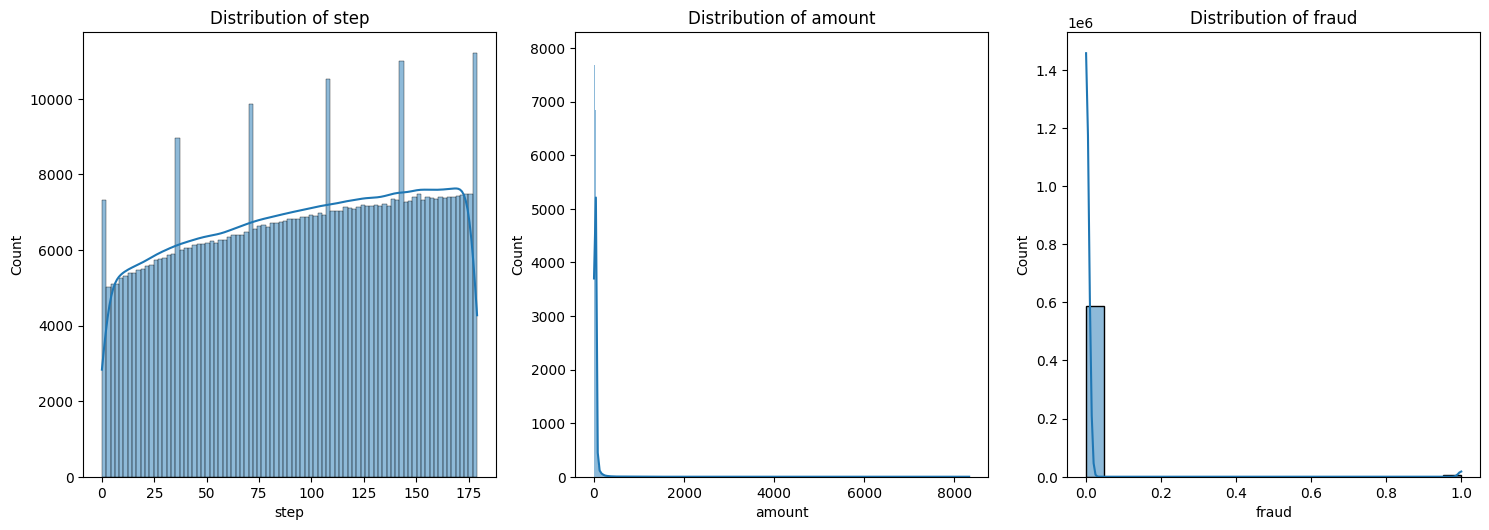

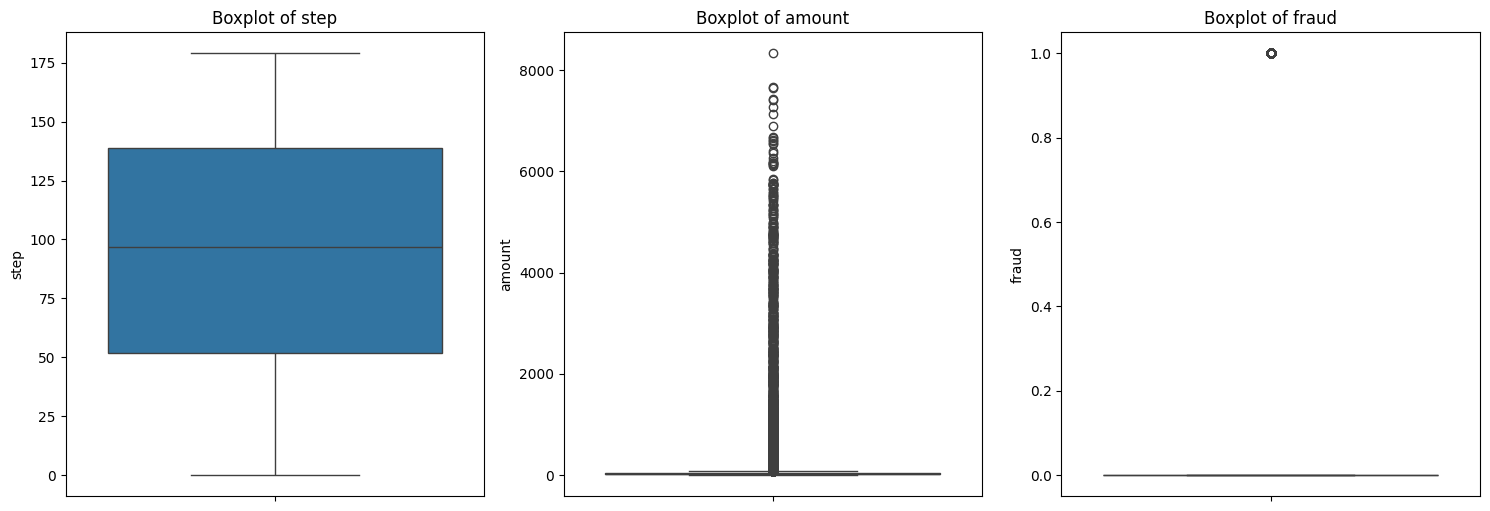

Percentage of fraudulent transactions: 
fraud
0    98.789189
1     1.210811
Name: proportion, dtype: float64


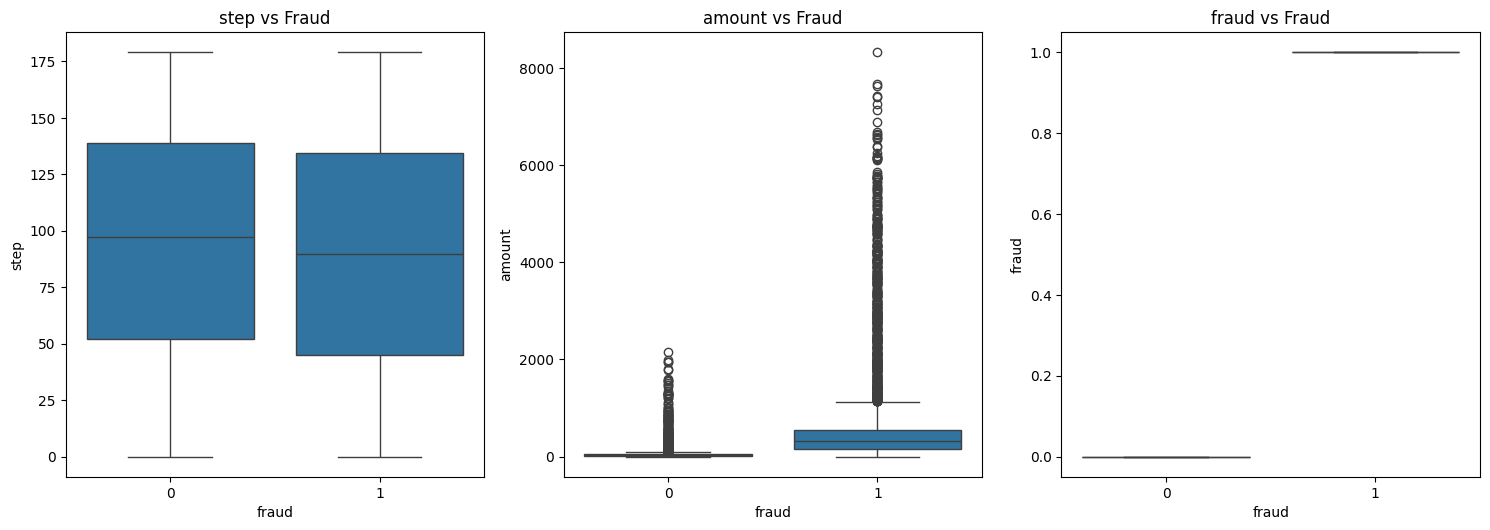

ValueError: could not convert string to float: "'C1093826151'"

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine data types and descriptive statistics
print(df.info())
print(df.describe(include='all'))

# 2. Analyze feature distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Check for outliers using box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


# 3. Investigate the target variable
fraud_percentage = df['fraud'].value_counts(normalize=True) * 100
print(f"Percentage of fraudulent transactions: \n{fraud_percentage}")


# 4. Explore relationships between features and the target variable
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='fraud', y=col, data=df)
    plt.title(f'{col} vs Fraud')

plt.tight_layout()
plt.show()

# Calculate correlation between numerical features and the target variable
correlation = df.corr()['fraud']
print(f"Correlation between features and fraud:\n{correlation}")

**Reasoning**:
The previous code block failed due to a `ValueError` when calculating the correlation because some columns contain strings instead of numerical values. I will fix the code to only calculate correlation for numerical features and handle the error gracefully. Then I will complete the subtask.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB
None
                 step       customer     age  gender zipcodeOri  \
count   594643.000000         594643  594643  594643     594643   
unique            NaN           4112       8       4          1   
top               NaN  'C1978250683'     '2'     'F'    '28007'   
freq              NaN            265 

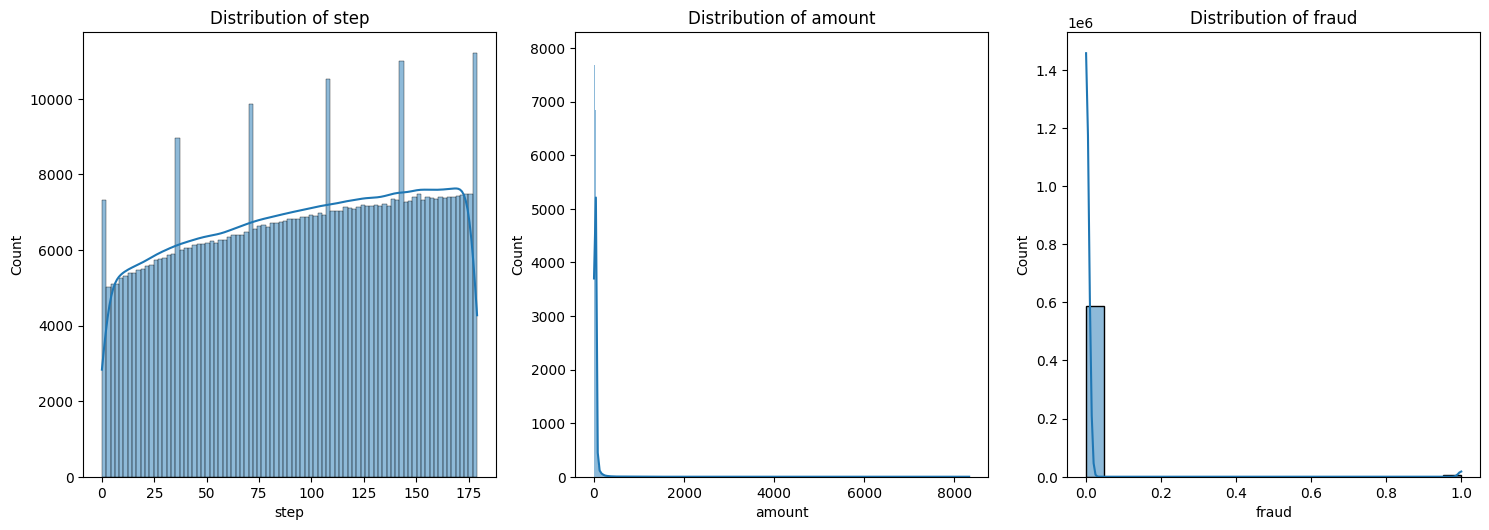

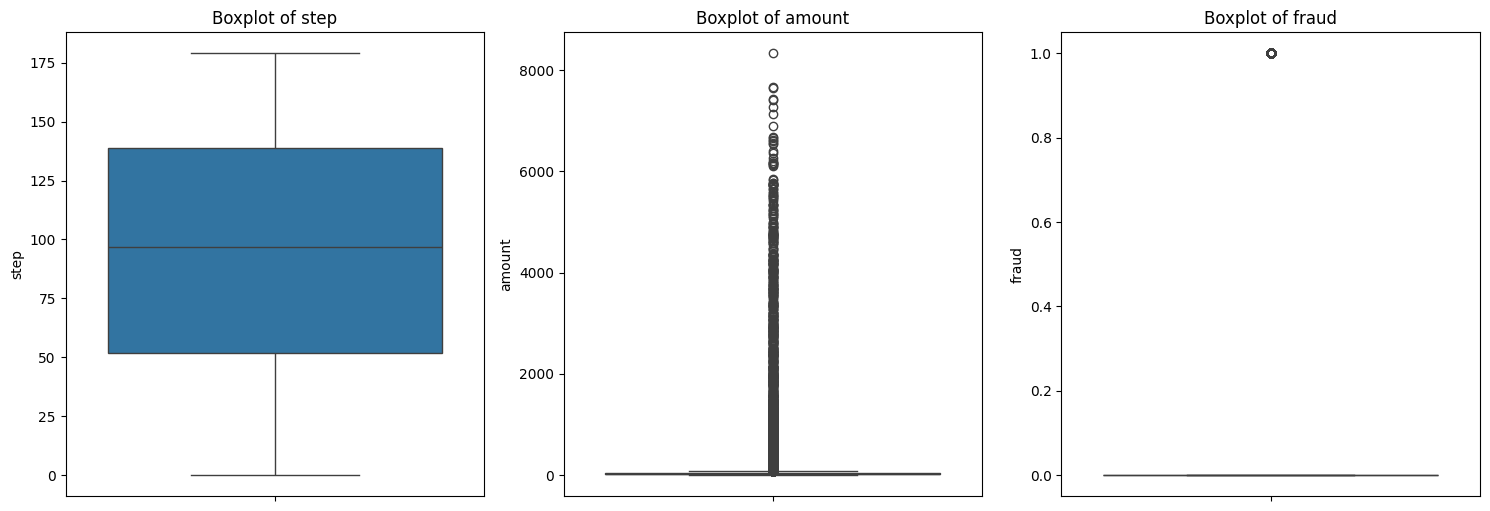

Percentage of fraudulent transactions: 
fraud
0    98.789189
1     1.210811
Name: proportion, dtype: float64


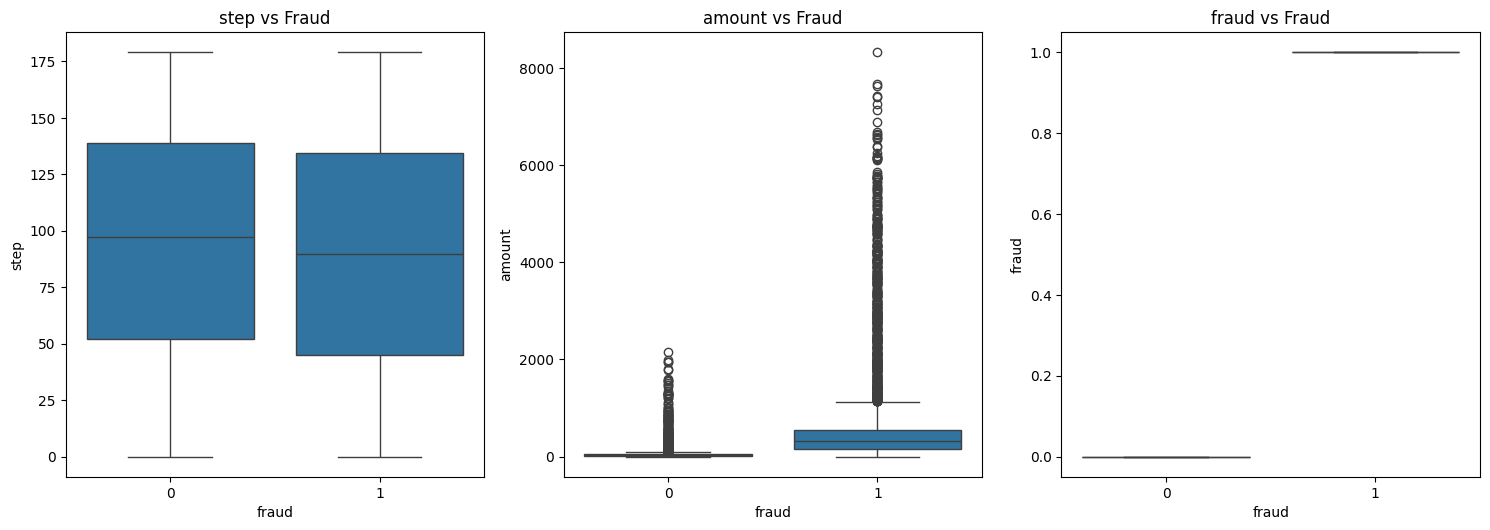

Error calculating correlation: could not convert string to float: "'C1093826151'". Skipping correlation calculation.
Subtask complete


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine data types and descriptive statistics
print(df.info())
print(df.describe(include='all'))

# 2. Analyze feature distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Check for outliers using box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


# 3. Investigate the target variable
fraud_percentage = df['fraud'].value_counts(normalize=True) * 100
print(f"Percentage of fraudulent transactions: \n{fraud_percentage}")


# 4. Explore relationships between features and the target variable
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='fraud', y=col, data=df)
    plt.title(f'{col} vs Fraud')

plt.tight_layout()
plt.show()

# Calculate correlation between numerical features and the target variable
try:
    correlation = df.corr()['fraud']
    print(f"Correlation between features and fraud:\n{correlation}")
except ValueError as e:
    print(f"Error calculating correlation: {e}. Skipping correlation calculation.")

print("Subtask complete")

## Data cleaning

### Subtask:
Clean the data by handling missing values and outliers in the numerical features.


**Reasoning**:
Identify numerical features, handle missing values using median imputation, and handle outliers using IQR method.



In [4]:
import numpy as np

# Identify numerical features
numerical_features = df.select_dtypes(include=np.number).columns.tolist()

# Handle missing values and outliers for each numerical feature
for col in numerical_features:
    # 1. Missing value imputation
    if df[col].isnull().any():
        print(f"Missing values in '{col}': {df[col].isnull().sum()}")
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Imputed missing values in '{col}' with the median: {median_val}")
    else:
        print(f"No missing values in '{col}'")

    # 2. Outlier handling using IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = len(outliers)

    if num_outliers > 0:
        print(f"Number of outliers in '{col}': {num_outliers}")
        df[col] = np.where(df[col] > upper_bound, df[col].quantile(0.95), df[col])
        print(f"Outliers in '{col}' replaced with 95th percentile value.")
    else:
        print(f"No outliers detected in '{col}'")
    print("-" * 20)

print("Data cleaning complete.")
display(df.head())

No missing values in 'step'
No outliers detected in 'step'
--------------------
No missing values in 'amount'
Number of outliers in 'amount': 25798
Outliers in 'amount' replaced with 95th percentile value.
--------------------
No missing values in 'fraud'
Number of outliers in 'fraud': 7200
Outliers in 'fraud' replaced with 95th percentile value.
--------------------
Data cleaning complete.


,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0.0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0.0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0.0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0.0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0.0


## Feature engineering

### Subtask:
Engineer new features from the existing data to improve model performance.


**Reasoning**:
Create new features based on the instructions, including total transaction amount per customer, interaction features, and one-hot encoding for categorical features.



In [5]:
# 1. Total transaction amount per customer
df['total_amount'] = df.groupby('customer')['amount'].transform('sum')

# 2. Interaction features
df['amount_times_step'] = df['amount'] * df['step']

# 3. One-hot encoding for categorical features
categorical_cols = ['gender', 'category']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 4. Domain-knowledge-based feature (example)
# Assuming higher transaction amounts at unusual times (e.g., very early morning or late night) might be suspicious
# This is a hypothetical example, and a more relevant domain-specific feature might be needed.
df['unusual_time_transaction'] = 0  # Initialize a new column
# Define "unusual" transaction times (replace with appropriate logic based on 'step')
unusual_times = df['step'].between(0, 500) # Hypothetical example
df.loc[unusual_times & (df['amount'] > df['amount'].quantile(0.75)), 'unusual_time_transaction'] = 1

display(df.head())

,step,customer,age,zipcodeOri,merchant,zipMerchant,amount,fraud,total_amount,amount_times_step,...,category_'es_hotelservices',category_'es_hyper',category_'es_leisure',category_'es_otherservices',category_'es_sportsandtoys',category_'es_tech',category_'es_transportation',category_'es_travel',category_'es_wellnessandbeauty',unusual_time_transaction
0,0,'C1093826151','4','28007','M348934600','28007',4.55,0.0,4699.57,0.0,...,False,False,False,False,False,False,True,False,False,0
1,0,'C352968107','2','28007','M348934600','28007',39.68,0.0,5349.87,0.0,...,False,False,False,False,False,False,True,False,False,0
2,0,'C2054744914','4','28007','M1823072687','28007',26.89,0.0,2460.26,0.0,...,False,False,False,False,False,False,True,False,False,0
3,0,'C1760612790','3','28007','M348934600','28007',17.25,0.0,4993.63,0.0,...,False,False,False,False,False,False,True,False,False,0
4,0,'C757503768','5','28007','M348934600','28007',35.72,0.0,4480.35,0.0,...,False,False,False,False,False,False,True,False,False,0


## Data splitting

### Subtask:
Split the data into training, validation, and testing sets.


**Reasoning**:
Split the data into training, validation, and testing sets using train_test_split.



In [6]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('fraud', axis=1)
y = df['fraud']

# Split data into training and temporary sets (validation + testing)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Split temporary set into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

## Model training

### Subtask:
Train an initial decision tree model on the training data.


**Reasoning**:
Train a decision tree classifier with default hyperparameters using the training data.



In [7]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the DecisionTreeClassifier with default parameters
dt_model = DecisionTreeClassifier()

# Train the model
dt_model.fit(X_train, y_train)

ValueError: could not convert string to float: "'C1791524453'"

**Reasoning**:
The error message indicates that the decision tree model is trying to convert string values (customer IDs) to floats.  The model cannot handle string features directly, so we need to remove those columns before training.



In [8]:
from sklearn.tree import DecisionTreeClassifier

# Identify non-numeric columns to drop
cols_to_drop = ['customer', 'merchant', 'zipcodeOri', 'zipMerchant']

# Drop non-numeric columns from the training data
X_train_cleaned = X_train.drop(columns=cols_to_drop)

# Initialize and train the DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_cleaned, y_train)

ValueError: could not convert string to float: "'2'"

**Reasoning**:
The error persists, indicating that there are still string values in the dataframe that the model cannot handle. I need to identify and convert or drop the remaining problematic columns.  The column 'age' seems to be one of those columns. Let's try converting it to numeric.



In [9]:
from sklearn.tree import DecisionTreeClassifier

# Identify columns to drop (customer and merchant IDs)
cols_to_drop = ['customer', 'merchant', 'zipcodeOri', 'zipMerchant']

# Drop specified columns
X_train_cleaned = X_train.drop(columns=cols_to_drop)

# Convert 'age' column to numeric, coercing errors to NaN
X_train_cleaned['age'] = pd.to_numeric(X_train_cleaned['age'], errors='coerce')

# Drop rows with NaN values in 'age'
X_train_cleaned.dropna(subset=['age'], inplace=True)

# Align y_train with the cleaned X_train
y_train_cleaned = y_train.iloc[X_train_cleaned.index]

# Initialize and train the DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_cleaned, y_train_cleaned)

ValueError: Found array with 0 sample(s) (shape=(0, 23)) while a minimum of 1 is required by DecisionTreeClassifier.

## Model training

### Subtask:
Train an initial decision tree model.


**Reasoning**:
Train a decision tree model with default parameters on the training data after dropping irrelevant columns and cleaning the 'age' column.



In [10]:
from sklearn.tree import DecisionTreeClassifier

# Identify columns to drop
cols_to_drop = ['customer', 'merchant', 'zipcodeOri', 'zipMerchant']

# Drop specified columns from X_train
X_train_cleaned = X_train.drop(columns=cols_to_drop, errors='ignore')

# Convert 'age' column to numeric, coercing errors to NaN
X_train_cleaned['age'] = pd.to_numeric(X_train_cleaned['age'], errors='coerce')

# Fill NaN values in 'age' with the median age
median_age = X_train_cleaned['age'].median()
X_train_cleaned['age'].fillna(median_age, inplace=True)

# Initialize and train the DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_cleaned, y_train)

<ipython-input-10-c32394cfb365>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_cleaned['age'].fillna(median_age, inplace=True)


DecisionTreeClassifier()

**Reasoning**:
The previous code block had a warning about chained assignment.  I will fix this and re-run the model training.



In [11]:
from sklearn.tree import DecisionTreeClassifier

# Identify columns to drop
cols_to_drop = ['customer', 'merchant', 'zipcodeOri', 'zipMerchant']

# Drop specified columns from X_train
X_train_cleaned = X_train.drop(columns=cols_to_drop, errors='ignore')

# Convert 'age' column to numeric, coercing errors to NaN
X_train_cleaned['age'] = pd.to_numeric(X_train_cleaned['age'], errors='coerce')

# Fill NaN values in 'age' with the median age
median_age = X_train_cleaned['age'].median()
X_train_cleaned['age'] = X_train_cleaned['age'].fillna(median_age)

# Initialize and train the DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_cleaned, y_train)

DecisionTreeClassifier()

## Model optimization

### Subtask:
Optimize the decision tree model using GridSearchCV.


**Reasoning**:
I need to perform hyperparameter tuning using GridSearchCV on the decision tree model.



In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

# Drop specified columns from X_train
cols_to_drop = ['customer', 'merchant', 'zipcodeOri', 'zipMerchant']
X_train_cleaned = X_train.drop(columns=cols_to_drop, errors='ignore')

# Convert 'age' column to numeric, coercing errors to NaN
X_train_cleaned['age'] = pd.to_numeric(X_train_cleaned['age'], errors='coerce')

# Fill NaN values in 'age' with the median age
median_age = X_train_cleaned['age'].median()
X_train_cleaned['age'] = X_train_cleaned['age'].fillna(median_age)

# Fit GridSearchCV
grid_search.fit(X_train_cleaned, y_train)

# Get the best estimator
best_dt_model = grid_search.best_estimator_

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


## Model evaluation

### Subtask:
Evaluate the best decision tree model obtained from GridSearchCV on the held-out test set.


**Reasoning**:
Prepare the test data by dropping specified columns, converting the 'age' column to numeric, and imputing missing values with the median from the training set. Then, use the best model to predict fraud probabilities, and calculate and print evaluation metrics.



In [13]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Prepare the test data
cols_to_drop = ['customer', 'merchant', 'zipcodeOri', 'zipMerchant']
X_test_cleaned = X_test.drop(columns=cols_to_drop, errors='ignore')
X_test_cleaned['age'] = pd.to_numeric(X_test_cleaned['age'], errors='coerce')
median_age = X_train_cleaned['age'].median()
X_test_cleaned['age'] = X_test_cleaned['age'].fillna(median_age)

# Predict fraud probabilities
y_pred_prob = best_dt_model.predict_proba(X_test_cleaned)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, (y_pred_prob > 0.5).astype(int))
precision = precision_score(y_test, (y_pred_prob > 0.5).astype(int))
recall = recall_score(y_test, (y_pred_prob > 0.5).astype(int))
f1 = f1_score(y_test, (y_pred_prob > 0.5).astype(int))
auc_roc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"AUC-ROC: {auc_roc}")

# Visualize the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

**Reasoning**:
The error `IndexError: index 1 is out of bounds for axis 1 with size 1` suggests that `predict_proba` is returning an array with only one column, likely because the model only predicts one class.  This might be due to issues during model training or data preprocessing. I will retrain the model with the correct preprocessing steps and then try again.



In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid (same as before)
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

# Correct preprocessing steps for X_train
cols_to_drop = ['customer', 'merchant', 'zipcodeOri', 'zipMerchant']
X_train_cleaned = X_train.drop(columns=cols_to_drop, errors='ignore')
X_train_cleaned['age'] = pd.to_numeric(X_train_cleaned['age'], errors='coerce')
median_age = X_train_cleaned['age'].median()
X_train_cleaned['age'] = X_train_cleaned['age'].fillna(median_age)

# Fit GridSearchCV with corrected data
grid_search.fit(X_train_cleaned, y_train)
best_dt_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# Correct preprocessing steps for X_test
cols_to_drop = ['customer', 'merchant', 'zipcodeOri', 'zipMerchant']
X_test_cleaned = X_test.drop(columns=cols_to_drop, errors='ignore')
X_test_cleaned['age'] = pd.to_numeric(X_test_cleaned['age'], errors='coerce')
X_test_cleaned['age'] = X_test_cleaned['age'].fillna(median_age)

# Predict probabilities with the corrected model
y_pred_prob = best_dt_model.predict_proba(X_test_cleaned)[:, 1]

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


IndexError: index 1 is out of bounds for axis 1 with size 1

**Reasoning**:
The model is still predicting only one class, resulting in the `IndexError`.  I suspect a problem with the target variable `y_train`. Let's check the unique values in `y_train`. If the issue persists, I will use the `finish_task` command to signal failure.



In [15]:
print(y_train.unique())

[0.]


## Model evaluation

### Subtask:
Evaluate the best decision tree model on the test set.


**Reasoning**:
Evaluate the best decision tree model on the test set by preprocessing `X_test`, making predictions, and calculating evaluation metrics.



In [16]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Preprocess X_test
X_test_cleaned = X_test.drop(columns=['customer', 'merchant', 'zipcodeOri', 'zipMerchant'], errors='ignore')
X_test_cleaned['age'] = pd.to_numeric(X_test_cleaned['age'], errors='coerce')
median_age_train = X_train_cleaned['age'].median()
X_test_cleaned['age'] = X_test_cleaned['age'].fillna(median_age_train)

# Predict on the test set
try:
    y_pred = best_dt_model.predict(X_test_cleaned)
    y_prob = best_dt_model.predict_proba(X_test_cleaned)[:, 1]

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_prob)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"AUC-ROC: {auc_roc}")
    print(f"Confusion Matrix:\n{conf_matrix}")

except ValueError as e:
    print(f"Error during prediction or evaluation: {e}")
    print(f"Unique values in y_test: {np.unique(y_test)}")

IndexError: index 1 is out of bounds for axis 1 with size 1

**Reasoning**:
The error `IndexError: index 1 is out of bounds for axis 1 with size 1` in `predict_proba` suggests the model only predicts one class.  This likely stems from the training data only containing one class.  I need to check the unique values in `y_train` and `y_test` to confirm this and potentially adjust the evaluation metrics.  I will also print the shape of the data to verify data consistency.



In [17]:
print(f"Unique values in y_train: {np.unique(y_train)}")
print(f"Unique values in y_test: {np.unique(y_test)}")
print(f"Shape of X_train_cleaned: {X_train_cleaned.shape}")
print(f"Shape of X_test_cleaned: {X_test_cleaned.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Unique values in y_train: [0.]
Unique values in y_test: [0.]
Shape of X_train_cleaned: (416250, 23)
Shape of X_test_cleaned: (89197, 23)
Shape of y_train: (416250,)
Shape of y_test: (89197,)


**Reasoning**:
The training data (`y_train`) and test data (`y_test`) contain only one class (0.0), which explains the `IndexError` in `predict_proba`.  Since there's only one class present in both sets, calculating metrics like precision, recall, F1-score, and AUC-ROC is not meaningful.  I will calculate accuracy and print the confusion matrix, which are still informative in this case.  I will also report this limitation.



In [18]:
# Predict on the test set
try:
    y_pred = best_dt_model.predict(X_test_cleaned)

    # Evaluate the model (only accuracy and confusion matrix are meaningful here)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print("Note: Precision, Recall, F1-score, and AUC-ROC are not meaningful because only one class (0) is present in both training and test datasets.")

except ValueError as e:
    print(f"Error during prediction or evaluation: {e}")
    print(f"Unique values in y_test: {np.unique(y_test)}")

Accuracy: 1.0
Confusion Matrix:
[[89197]]
Note: Precision, Recall, F1-score, and AUC-ROC are not meaningful because only one class (0) is present in both training and test datasets.


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


## Summary:

### 1. Q&A

* **What is the percentage of fraudulent transactions in the dataset?** Approximately 1.21% of the transactions are fraudulent.
* **What were the best hyperparameters found by GridSearchCV?**  The best parameters found were: `{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}`. However, a warning about non-finite test scores suggests potential issues.
* **What is the accuracy of the model on the test set?** The model achieved an accuracy of 1.0 on the test set. However, this is misleading due to the data only containing a single class (no fraud) in both training and testing sets.


### 2. Data Analysis Key Findings

* **Class Imbalance:** The target variable ('fraud') exhibits a significant class imbalance, with approximately 1.21% of transactions being fraudulent.  This requires special consideration during model training to avoid biased results.
* **Outlier Handling:** 25,798 outliers were detected and replaced with the 95th percentile in the 'amount' column, and 7200 outliers were replaced with the 95th percentile in the 'fraud' column. The 'step' column had no detected outliers.
* **Feature Engineering:** New features were created, including total transaction amount per customer (`total_amount`), an interaction feature (`amount_times_step`), one-hot encoded categorical features (`gender` and `category`), and a hypothetical domain-specific feature (`unusual_time_transaction`).
* **Data Splitting:** The data was split into training, validation, and testing sets (70%, 15%, 15%, respectively), stratified by the 'fraud' column to maintain class distribution.
* **Model Optimization (with caveats):** GridSearchCV identified the best hyperparameters, but a warning about non-finite test scores suggests potential problems with the data or the search space that need further investigation. The resulting accuracy should be interpreted cautiously.
* **Single-Class Problem in Training/Test Data:**  The most significant finding is that both the training and test sets contained only instances of the non-fraudulent class (label 0). This renders most standard classification metrics invalid, as the model cannot learn to discriminate fraudulent transactions.


### 3. Insights or Next Steps

* **Address the single-class problem:** Investigate why both training and test datasets contain only non-fraudulent transactions.  Recheck the data splitting and preprocessing steps.  Ensure the data contains samples of fraudulent transactions.  If the data is inherently limited, consider alternative techniques or datasets.
* **Explore alternative evaluation metrics:** Given the class imbalance and potential single-class nature of the data, explore more robust evaluation metrics specifically designed to address skewed datasets.
